In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("vgsales.csv")

# Video Games Sales Analysis

<img src="start.png" alt="Alternative text" />

In [5]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
df["Publisher"] = df["Publisher"].fillna("Unknown")

In [9]:
threshold = len(df) * 0.05
cols_to_drop = df.columns[df.isna().sum() <= threshold]

#Then drop
df.dropna(subset=cols_to_drop, inplace=True)

In [10]:
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [11]:
df["Year"] = df["Year"].astype(int)

## Sales Per Region

In [12]:
top_sale_reg = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
# pd.DataFrame(top_sale_reg.sum(), columns=['a', 'b'])
top_sale_reg = top_sale_reg.sum().reset_index()
top_sale_reg = top_sale_reg.rename(columns={"index": "region", 0: "sale"})
top_sale_reg

,region,sale
0,NA_Sales,4333.43
1,EU_Sales,2409.12
2,JP_Sales,1284.30
3,Other_Sales,789.01


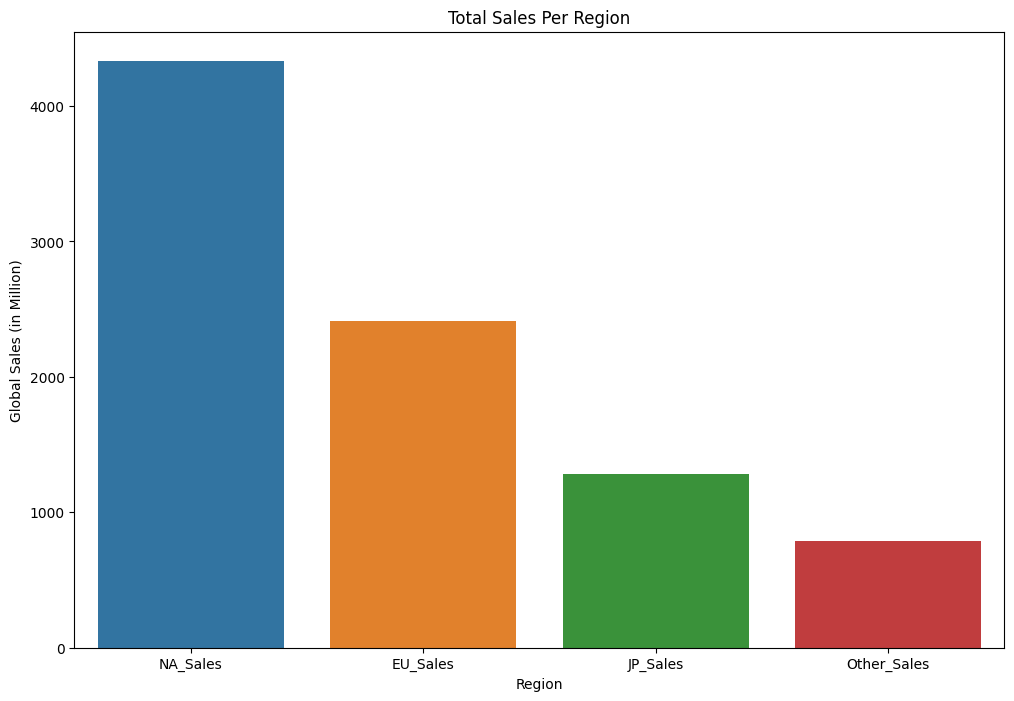

In [13]:
plt.figure(figsize=(12, 8))
sns.barplot(x='region', y='sale', data = top_sale_reg)
plt.title("Total Sales Per Region")
plt.xlabel('Region')
plt.ylabel('Global Sales (in Million)')
plt.show()

In [14]:
from plotly.subplots import make_subplots

In [15]:
data1 = pd.DataFrame(df.groupby("Platform")[["Global_Sales"]].sum().sort_values(by=['Global_Sales'],ascending=[False]).reset_index())
data1.rename(columns = {'Platform':'Platform_Global'}, inplace = True)

data2 = pd.DataFrame(df.groupby("Platform")[["NA_Sales"]].sum().sort_values(by=['NA_Sales'],ascending=[False]).reset_index())
data2.rename(columns = {'Platform':'Platform_NA'}, inplace = True)

#Grouping the europe sales based on each platform
data3 = pd.DataFrame(df.groupby("Platform")[["EU_Sales"]].sum().sort_values(by=['EU_Sales'],ascending=[False]).reset_index())
data3.rename(columns = {'Platform':'Platform_EU'}, inplace = True)

#Grouping the japan sales based on each platform
data4 = pd.DataFrame(df.groupby("Platform")[["JP_Sales"]].sum().sort_values(by=['JP_Sales'],ascending=[False]).reset_index())
data4.rename(columns = {'Platform':'Platform_JP'}, inplace = True)

#Grouping the other region sales based on each platform
data5 = pd.DataFrame(df.groupby("Platform")[["Other_Sales"]].sum().sort_values(by=['Other_Sales'],ascending=[False]).reset_index())
data5.rename(columns = {'Platform':'Platform_other'}, inplace = True)

#Concatenating our datasets
data=pd.concat([data1, data2,data3,data4,data5],axis=1)
data.head(3)

,Platform_Global,Global_Sales,Platform_NA,NA_Sales,Platform_EU,EU_Sales,Platform_JP,JP_Sales,Platform_other,Other_Sales
0,PS2,1233.46,X360,594.33,PS3,340.47,DS,175.02,PS2,190.47
1,X360,969.61,PS2,572.92,PS2,332.63,PS,139.78,PS3,140.81
2,PS3,949.35,Wii,497.37,X360,278.01,PS2,137.54,X360,84.67


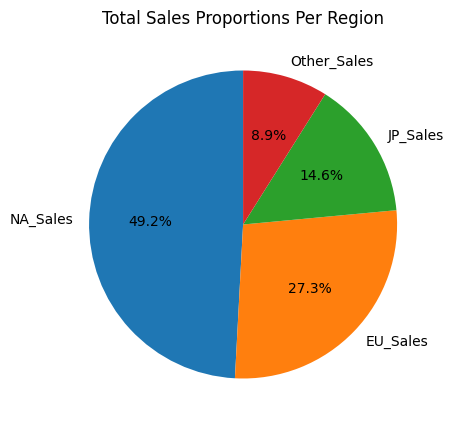

In [16]:
labels = top_sale_reg['region']
sizes = top_sale_reg['sale']
plt.figure(figsize=(10, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Total Sales Proportions Per Region")
plt.show()

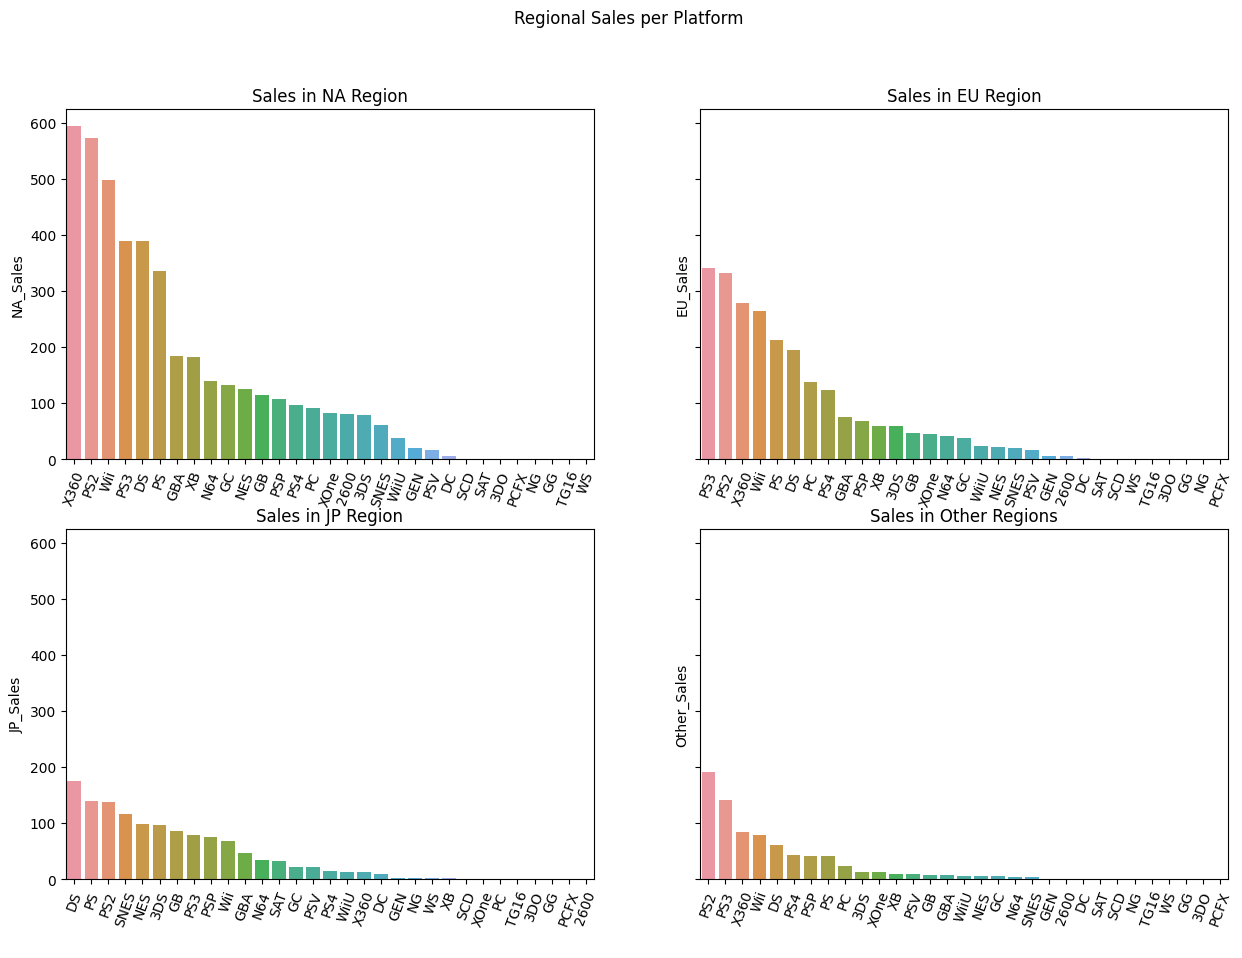

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Regional Sales per Platform')

sns.barplot(ax=axes[0][0], x=data['Platform_NA'], y=data['NA_Sales'])
sns.barplot(ax=axes[0][1], x=data['Platform_EU'], y=data['EU_Sales'])
sns.barplot(ax=axes[1][0], x=data['Platform_JP'], y=data['JP_Sales'])
sns.barplot(ax=axes[1][1], x=data['Platform_other'], y=data['Other_Sales'])

axes[0][0].set_xticklabels(data['Platform_NA'], rotation=70)
axes[0][1].set_xticklabels(data['Platform_EU'], rotation=70)
axes[1][0].set_xticklabels(data['Platform_JP'], rotation=70)
axes[1][1].set_xticklabels(data['Platform_other'], rotation=70)

axes[0][0].set_title("Sales in NA Region")
axes[0][1].set_title("Sales in EU Region")
axes[1][0].set_title("Sales in JP Region")
axes[1][1].set_title("Sales in Other Regions")

axes[0][0].set_xlabel(" ")
axes[0][1].set_xlabel(" ")
axes[1][0].set_xlabel(" ")
axes[1][1].set_xlabel(" ")

plt.show()

## Top Selling Titles

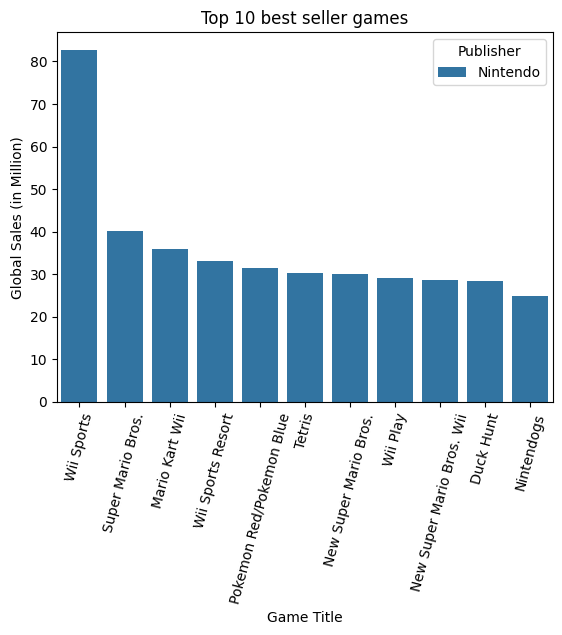

In [38]:
sns.barplot(data=df[:11], x="Name", y="Global_Sales", hue="Publisher")
plt.xticks(rotation=75)
plt.title("Top 10 best seller games")
plt.xlabel('Game Title')
plt.ylabel('Global Sales (in Million)')
plt.show()

## Top Released Genres

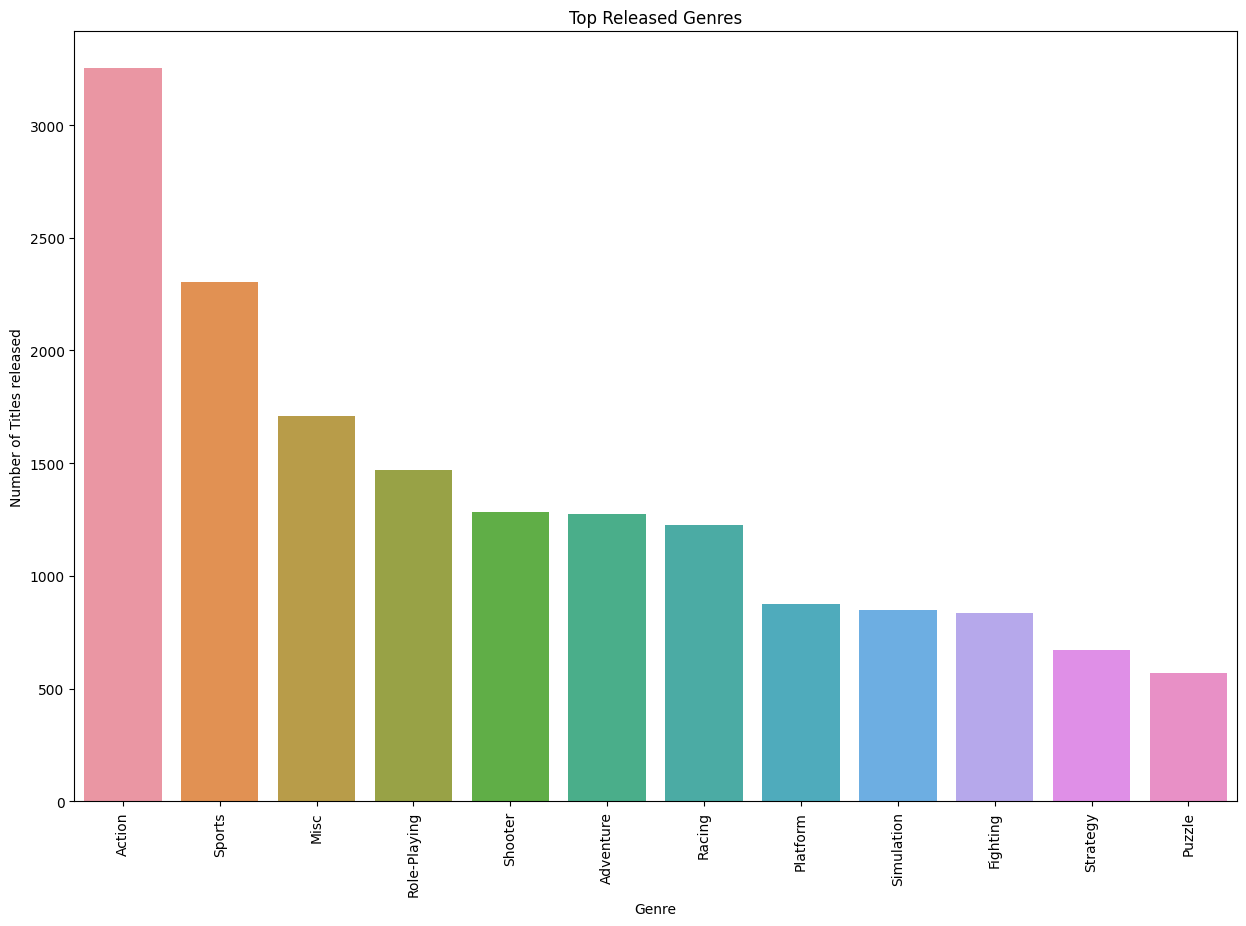

In [19]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Genre", data=df, order = df['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Top Released Genres")
plt.xlabel('Genre')
plt.ylabel('Number of Titles released')
plt.show()

## Top Selling Years

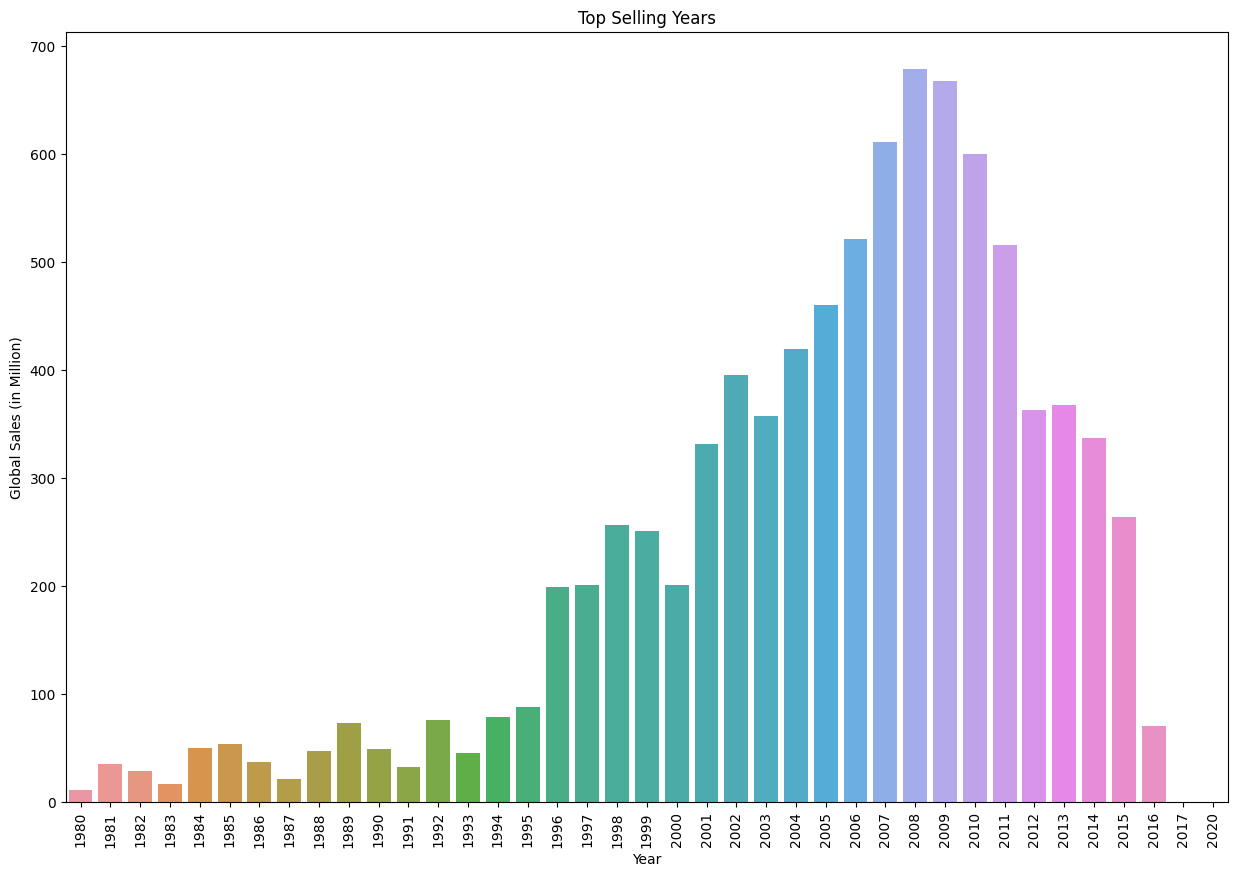

In [20]:
data_year = df.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(x="Year", y="Global_Sales", data=data_year)
plt.xticks(rotation=90)
plt.title("Top Selling Years")
plt.xlabel('Year')
plt.ylabel('Global Sales (in Million)')
plt.show()

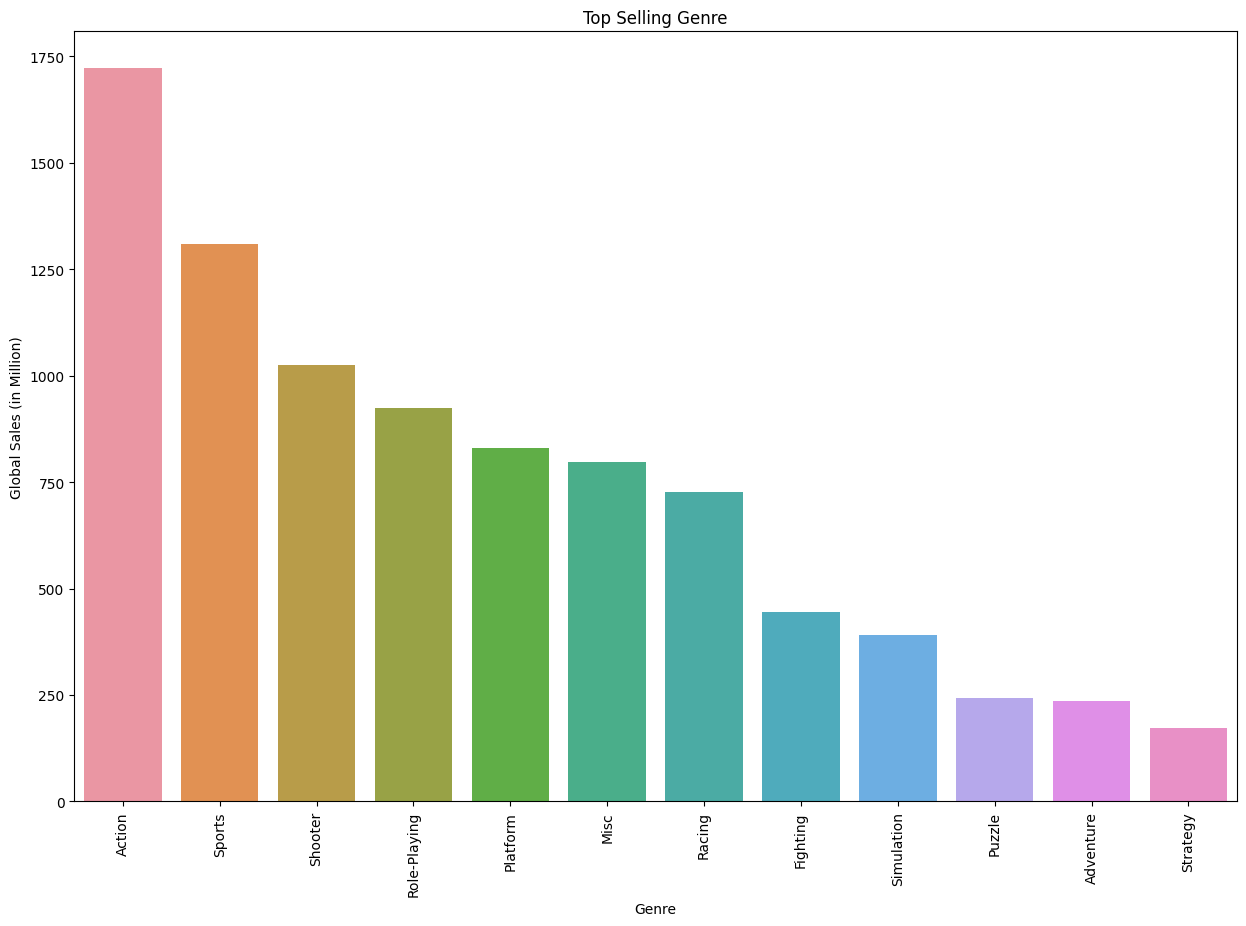

In [57]:
data_year = df.groupby(by=['Genre'])['Global_Sales'].sum()
data_year = data_year.reset_index()
plt.figure(figsize=(15, 10))
sns.barplot(x="Genre", y="Global_Sales", data=data_year, order = df.groupby(by=['Genre'])['Global_Sales'].sum().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.title("Top Selling Genre")
plt.xlabel('Genre')
plt.ylabel('Global Sales (in Million)')
plt.show()

## Top Years for Number of Releases

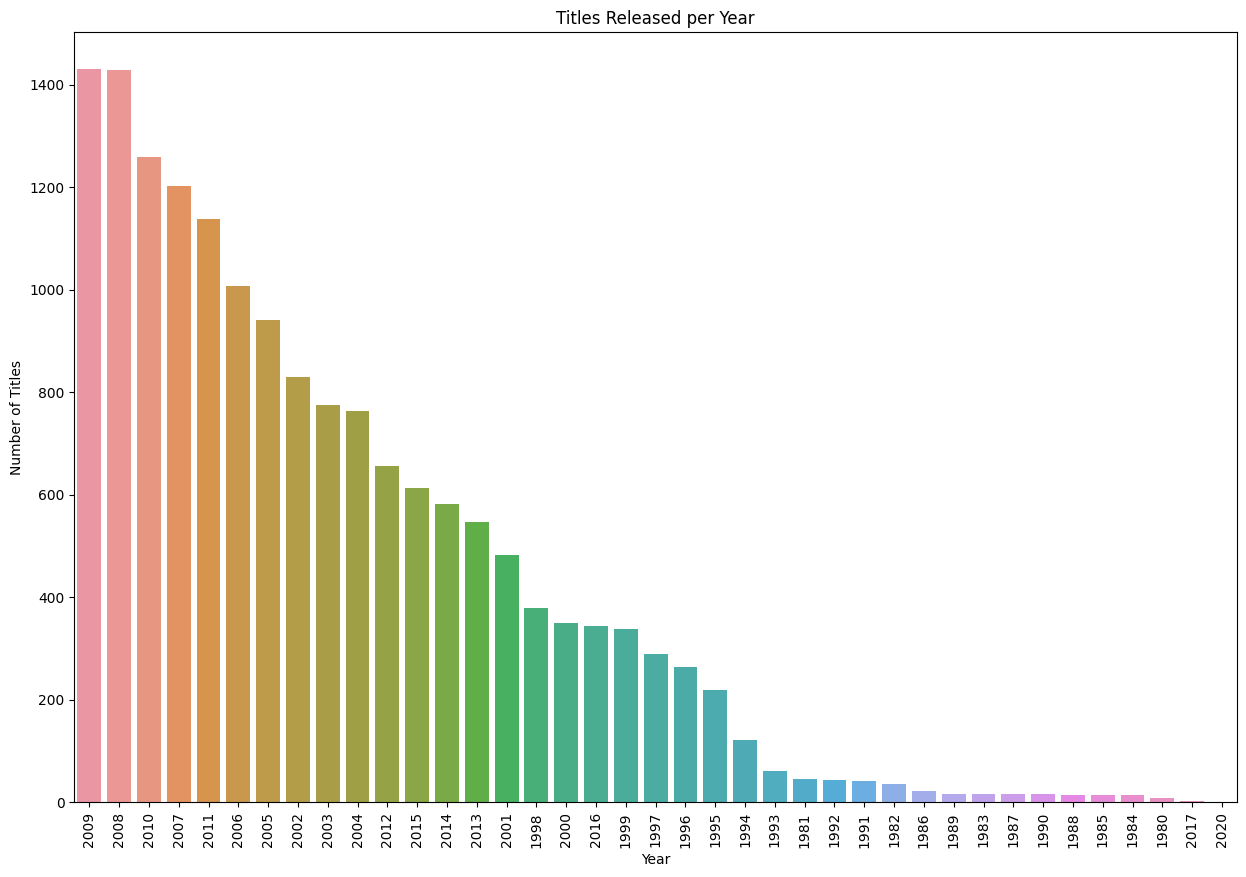

In [21]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Year", data=df, order = df.groupby(by=['Year'])['Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.title("Titles Released per Year")
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

## Top Publishers in Number of Game Released

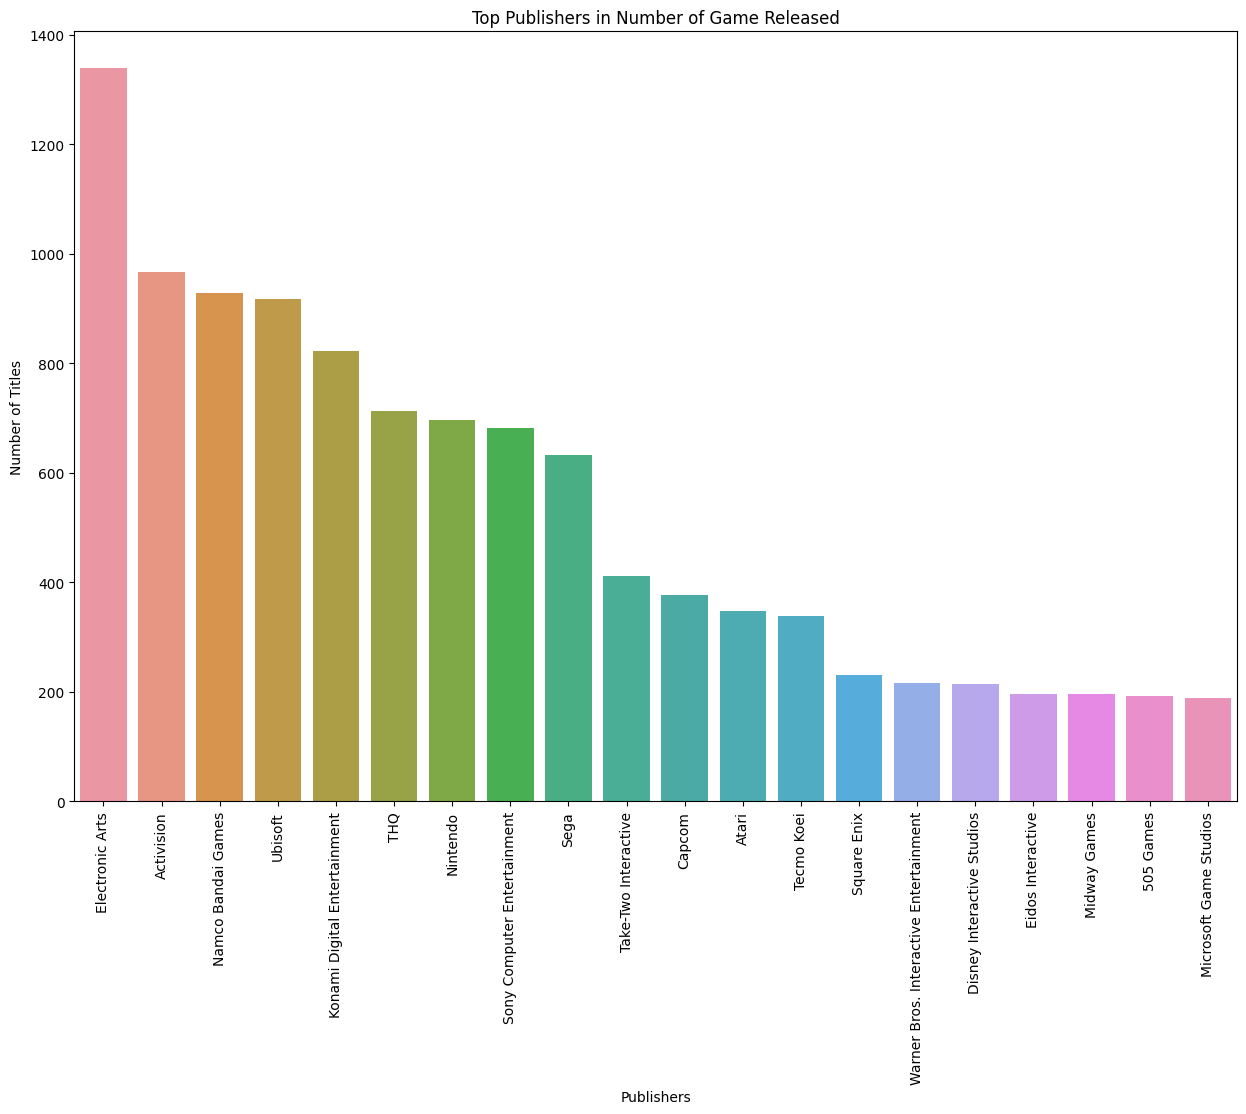

In [22]:
top_publisher = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).head(20)
top_publisher = pd.DataFrame(top_publisher).reset_index()
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=df, order = df.groupby(by=['Publisher'])['Year'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)
plt.title("Top Publishers in Number of Game Released")
plt.xlabel('Publishers')
plt.ylabel('Number of Titles')
plt.show()

## Top Publishers in Sales

In [23]:
sale_pbl = df[['Publisher', 'Global_Sales', "Genre"]]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()

In [54]:
sale_pbl[sale_pbl["Publisher"] == "Electronic Arts"]["Global_Sales"][1] / sale_pbl[sale_pbl["Publisher"] == "Nintendo"]["Global_Sales"][0]

0.6127390819477369

In [24]:
pivot_data = df[df["Publisher"].isin(sale_pbl["Publisher"].values)].pivot_table(index='Publisher', columns='Genre', values='Global_Sales', aggfunc='sum', fill_value=0)
pivot_data = pivot_data.reindex(sale_pbl["Publisher"].values)

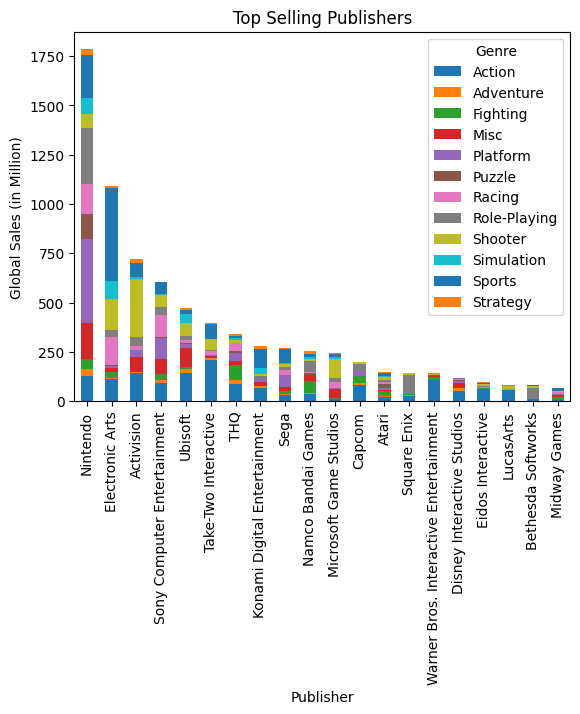

In [25]:
pivot_data.plot(kind='bar', stacked=True)
plt.xlabel('Publisher')
plt.ylabel('Global Sales (in Million)')
plt.title('Top Selling Publishers')
plt.show()

## Top Selling Platforms

In [26]:
df_platform = df.groupby(["Platform", "Year"], as_index=False).sum(["NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales"])
df_platform.drop("Rank", axis = 1, inplace=True)

In [27]:
df_platform_top = df_platform[["Platform", "Global_Sales"]].groupby("Platform", as_index=False).sum("Global_Sales")

In [28]:
df_platform_top = df_platform_top.sort_values("Global_Sales", ascending=False).reset_index(drop=True)

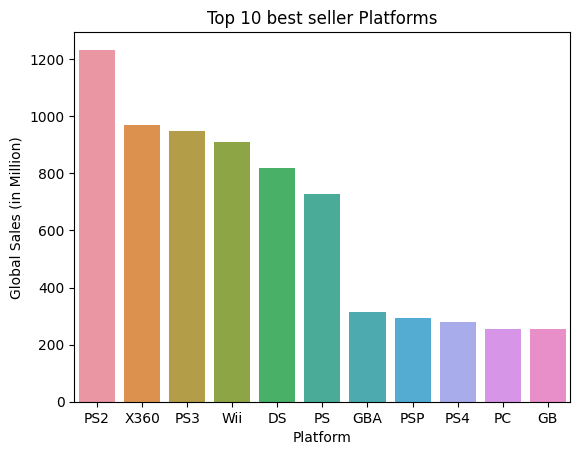

In [29]:
sns.barplot(data=df_platform_top[:11], x="Platform", y="Global_Sales")
plt.title("Top 10 best seller Platforms")
plt.xlabel('Platform')
plt.ylabel('Global Sales (in Million)')
plt.show()